In [ ]:
import pandas as pd
import numpy as np
import sklearn
import pickle
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/dataset.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Disease     4920 non-null   object
 1   Symptom_1   4920 non-null   object
 2   Symptom_2   4920 non-null   object
 3   Symptom_3   4920 non-null   object
 4   Symptom_4   4572 non-null   object
 5   Symptom_5   3714 non-null   object
 6   Symptom_6   2934 non-null   object
 7   Symptom_7   2268 non-null   object
 8   Symptom_8   1944 non-null   object
 9   Symptom_9   1692 non-null   object
 10  Symptom_10  1512 non-null   object
 11  Symptom_11  1194 non-null   object
 12  Symptom_12  744 non-null    object
 13  Symptom_13  504 non-null    object
 14  Symptom_14  306 non-null    object
 15  Symptom_15  240 non-null    object
 16  Symptom_16  192 non-null    object
 17  Symptom_17  72 non-null     object
dtypes: object(18)
memory usage: 692.0+ KB


In [ ]:
df = df.drop_duplicates()

In [ ]:
df

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,Impetigo,high_fever,blister,red_sore_around_nose,yellow_crust_ooze,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
403,Impetigo,skin_rash,blister,red_sore_around_nose,yellow_crust_ooze,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
405,Impetigo,skin_rash,high_fever,red_sore_around_nose,yellow_crust_ooze,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
406,Impetigo,skin_rash,high_fever,blister,yellow_crust_ooze,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
symptoms = np.concatenate((df.Symptom_1.unique(), df.Symptom_2.unique(), df.Symptom_3.unique(), df.Symptom_4.unique(), 
                          df.Symptom_5.unique(), df.Symptom_6.unique(), df.Symptom_7.unique(), df.Symptom_8.unique(), 
                          df.Symptom_9.unique(), df.Symptom_10.unique(), df.Symptom_11.unique(), df.Symptom_12.unique(), 
                          df.Symptom_13.unique(), df.Symptom_14.unique(), df.Symptom_15.unique(), df.Symptom_16.unique(), 
                          df.Symptom_17.unique()))

In [ ]:
symptoms_unique = list((set(symptoms)))

In [ ]:
len(symptoms_unique)

132

In [ ]:
i = 18
for each in symptoms_unique:
    df.insert(i, each, 0)
    i = i + 1

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  if self.run_code(code, result):


In [ ]:
df = df.fillna(0)

In [ ]:
for index, row in df.iterrows(): 
    disease_symptoms = [symptom for symptom in list(row)[1:] if symptom != 0]
    for each in disease_symptoms: 
        df.at[index, each] = 1

In [ ]:
df = df.drop(columns = ['Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4', 'Symptom_5', 'Symptom_6', 'Symptom_7', 'Symptom_8', 
             'Symptom_9', 'Symptom_10', 'Symptom_11', 'Symptom_12', 'Symptom_13', 'Symptom_14', 'Symptom_15', 'Symptom_16'
             , 'Symptom_17'])

In [ ]:
df = df.loc[:, df.columns.notnull()]
df.columns = df.columns.str.replace(' ', '')
df = df.reindex(sorted(df.columns), axis=1)

In [ ]:
list(df.columns)

['Disease',
 'abdominal_pain',
 'abnormal_menstruation',
 'acidity',
 'acute_liver_failure',
 'altered_sensorium',
 'anxiety',
 'back_pain',
 'belly_pain',
 'blackheads',
 'bladder_discomfort',
 'blister',
 'blood_in_sputum',
 'bloody_stool',
 'blurred_and_distorted_vision',
 'breathlessness',
 'brittle_nails',
 'bruising',
 'burning_micturition',
 'chest_pain',
 'chills',
 'cold_hands_and_feets',
 'coma',
 'congestion',
 'constipation',
 'continuous_feel_of_urine',
 'continuous_sneezing',
 'cough',
 'cramps',
 'dark_urine',
 'dehydration',
 'depression',
 'diarrhoea',
 'dischromic_patches',
 'distention_of_abdomen',
 'dizziness',
 'drying_and_tingling_lips',
 'enlarged_thyroid',
 'excessive_hunger',
 'extra_marital_contacts',
 'family_history',
 'fast_heart_rate',
 'fatigue',
 'fluid_overload',
 'foul_smell_ofurine',
 'headache',
 'high_fever',
 'hip_joint_pain',
 'history_of_alcohol_consumption',
 'increased_appetite',
 'indigestion',
 'inflammatory_nails',
 'internal_itching',
 'irr

## Description, Precaution and Symptom Severity data

In [ ]:
diseases_description = pd.read_csv("/content/symptom_Description.csv")
diseases_description['Disease'] = diseases_description['Disease'].apply(lambda x: x.lower().strip(" "))

In [ ]:
disease_precaution = pd.read_csv("/content/symptom_precaution.csv")
disease_precaution['Disease'] = disease_precaution['Disease'].apply(lambda x: x.lower().strip(" "))
disease_precaution

,Disease,Precaution_1,Precaution_2,Precaution_3,Precaution_4
0,drug reaction,stop irritation,consult nearest hospital,stop taking drug,follow up
1,malaria,Consult nearest hospital,avoid oily food,avoid non veg food,keep mosquitos out
2,allergy,apply calamine,cover area with bandage,keep a diary,use ice to compress itching
3,hypothyroidism,reduce stress,exercise,eat healthy,get proper sleep
4,psoriasis,wash hands with warm soapy water,stop bleeding using pressure,consult doctor,salt baths
5,gerd,avoid fatty spicy food,avoid lying down after eating,maintain healthy weight,exercise
6,chronic cholestasis,cold baths,anti itch medicine,consult doctor,eat healthy
7,hepatitis a,Consult nearest hospital,wash hands through,avoid fatty spicy food,medication
8,osteoarthristis,acetaminophen,consult nearest hospital,follow up,salt baths
9,(vertigo) paroymsal positional vertigo,lie down,avoid sudden change in body,avoid abrupt head movment,relax


In [ ]:
symptom_severity = pd.read_csv("/content/Symptom-severity.csv")
symptom_severity = symptom_severity.applymap(lambda s: s.lower().strip(" ").replace(" ", "") if type(s) == str else s)

## Building the machine learning models

In [ ]:
labels = df.to_numpy()[:, :1]
examples = df.to_numpy()[:, 1:]
list_of_symptoms = list(df.columns)[1:]

with open('/content/list_of_symptoms.pickle', 'wb') as data_file: 
    pickle.dump(list_of_symptoms, data_file)

print(len(labels))
print(len(examples))
print(len(list_of_symptoms))

304
304
131


In [ ]:
#print(labels)
print(examples)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
#test example

symptoms = ['stomach_pain', 'headache'] 
x_test = []

with open('/content/list_of_symptoms.pickle', 'rb') as data_file:
    symptoms_list = pickle.load(data_file)

for each in symptoms_list: 
    if each in symptoms:
        x_test.append(1)
    else: 
        x_test.append(0)

x_test = np.asarray(x_test) 

In [ ]:
#Cross validation function

def cross_validation(X_train, y_train, X_test, y_test, model_name, parameter_range=50): 
    train_errors = []
    test_errors = []
    
    parameters = np.linspace(1, parameter_range, parameter_range, dtype=int)
    
    for parameter in parameters: 
        if model_name == 'knn':            
            model = KNeighborsClassifier(n_neighbors=parameter, metric='cosine')
        elif model_name == 'logreg':
            model = LogisticRegression(solver='liblinear', C=1/(parameter*20))
        elif model_name == 'dctree':
            model = DecisionTreeClassifier(splitter='random', max_depth=parameter)
        elif model_name =='svm': 
            model = SVC(C=1/(parameter*10))
            
        model.fit(X_train, y_train)
        learning_error = 1 - model.score(X_train, y_train) 
        testing_error = 1 - model.score(X_test, y_test)
        train_errors.append(learning_error)
        test_errors.append(testing_error)
    
    if model_name == 'logreg':
        best_parameter_value = 1/(parameters[np.argmin(test_errors)]*20)
    elif model_name == 'svm': 
        best_parameter_value = 1/(parameters[np.argmin(test_errors)]*10)
    else: 
        best_parameter_value = parameters[np.argmin(test_errors)]
    
    return parameters, best_parameter_value, train_errors, test_errors

In [ ]:
#kNN algorithm

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, metric='cosine')
X_train, X_test, y_train, y_test = train_test_split(examples, labels.ravel(), test_size=0.25)
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='cosine')

In [ ]:
disease = knn.predict(x_test.reshape(1,-1))[0]
print(disease)

Paralysis (brain hemorrhage)


In [ ]:
knn.score(X_test, y_test)

0.9342105263157895

In [ ]:
#Additional information about disease and precautions

description = diseases_description.loc[diseases_description['Disease'] == disease.strip(" ").lower(), 'Description'].iloc[0]
print(description)

precaution = disease_precaution[disease_precaution['Disease'] == disease.strip(" ").lower()]
sentence = 'Precautions: ' + precaution.Precaution_1.iloc[0] + ", " + precaution.Precaution_2.iloc[0] + ", " + precaution.Precaution_3.iloc[0] + ", " + precaution.Precaution_4.iloc[0]
print(sentence)

Intracerebral hemorrhage (ICH) is when blood suddenly bursts into brain tissue, causing damage to your brain. Symptoms usually appear suddenly during ICH. They include headache, weakness, confusion, and paralysis, particularly on one side of your body.
Precautions: massage, eat healthy, exercise, consult doctor


In [ ]:
#Giving the advice about seeing the doctor if any of the symptoms has severity larger than 5 or if mean of all the symptoms is larger than 4

symptoms = ['stomach_pain', 'headache', 'coma'] 
severity = []

for each in symptoms: 
    severity.append(symptom_severity.loc[symptom_severity['Symptom'] == each.lower().strip(" ").replace(" ", ""), 'weight'].iloc[0])

if np.mean(severity) > 4 or np.max(severity) > 5:
    print("Considering your symptoms are severe, and Meddy isn't a real doctor, you should consider talking to one. :)")

Considering your symptoms are severe, and Meddy isn't a real doctor, you should consider talking to one. :)


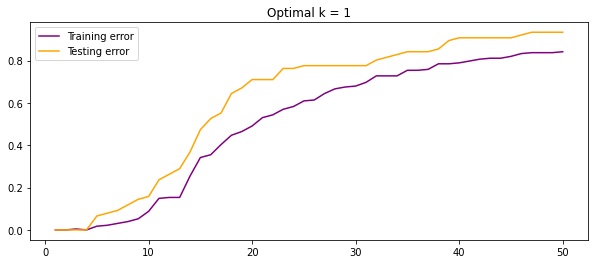

In [ ]:
k_range = 20

fig = plt.figure(figsize=(10,4))


k, best_k, train_errors, test_errors = cross_validation(X_train, y_train, X_test, y_test, model_name='knn')
plt.title(f"Optimal k = {best_k}")
plt.plot(k, train_errors, c='purple', label='Training error')
plt.plot(k, test_errors, c='orange', label='Testing error')
plt.legend()
        
plt.show()

In [ ]:
#Decision Tree

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(splitter='random', max_depth=100)

dc_tree = clf.fit(X_train, y_train)
dc_tree.predict(x_test.reshape(1,-1))

array(['Drug Reaction'], dtype=object)

In [ ]:
dc_tree.score(X_test, y_test)

0.6842105263157895

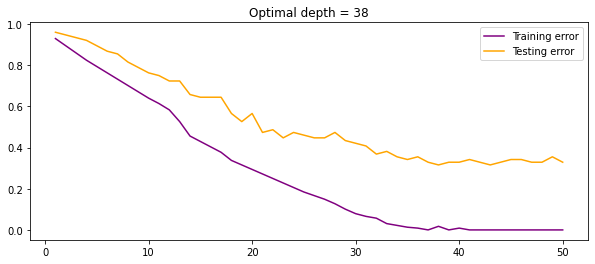

In [ ]:
fig = plt.figure(figsize=(10,4))

depth, best_depth, train_errors, test_errors = cross_validation(X_train, y_train, X_test, y_test, model_name='dctree')
plt.title(f"Optimal depth = {best_depth}")
plt.plot(depth, train_errors, c='purple', label='Training error')
plt.plot(depth, test_errors, c='orange', label='Testing error')
plt.legend()
        
plt.show()

In [ ]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='liblinear', C=0.05)

logreg.fit(X_train, y_train)
logreg.predict(x_test.reshape(1,-1))

array(['Hypertension '], dtype=object)

In [ ]:
print(logreg.score(X_test, y_test))

0.9342105263157895


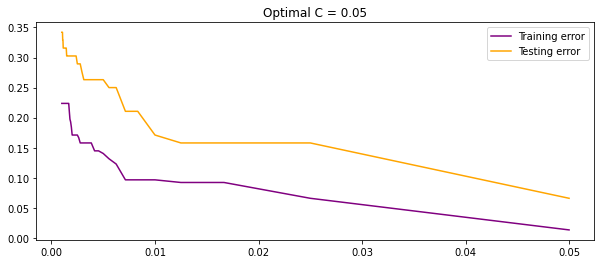

In [ ]:
fig = plt.figure(figsize=(10,4))

c, best_c, train_errors, test_errors = cross_validation(X_train, y_train, X_test, y_test, model_name='logreg')
c_reg = []
for each in c: 
    c_reg.append(1/(each*20))
plt.title(f"Optimal C = {best_c}")
plt.plot(c_reg, train_errors, c='purple', label='Training error')
plt.plot(c_reg, test_errors, c='orange', label='Testing error')
plt.legend()
        
plt.show()

In [ ]:
#Support Vector Machine (SVM)

from sklearn.svm import SVC

svm = SVC(C=0.3)
svm.fit(X_train, y_train)
svm.predict(x_test.reshape(1,-1))

array(['Paralysis (brain hemorrhage)'], dtype=object)

In [ ]:
print(svm.score(X_test, y_test))

0.8026315789473685


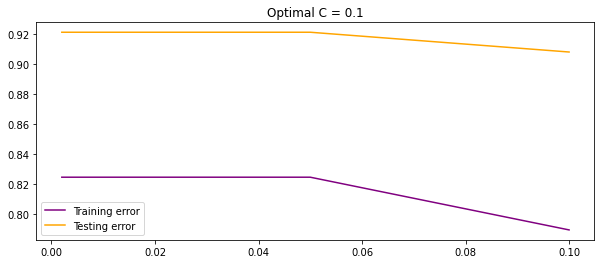

In [ ]:
fig = plt.figure(figsize=(10,4))

c, best_c, train_errors, test_errors = cross_validation(X_train, y_train, X_test, y_test, model_name='svm')
c_reg = []
for each in c: 
    c_reg.append(1/(each*10))
plt.title(f"Optimal C = {best_c}")
plt.plot(c_reg, train_errors, c='purple', label='Training error')
plt.plot(c_reg, test_errors, c='orange', label='Testing error')
plt.legend()
        
plt.show()

## Ensemble Learning

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores
    
def get_stacking():
    level0 = list()
    level0.append(('lr', LogisticRegression(solver='liblinear', C=0.03)))
    level0.append(('knn', KNeighborsClassifier(n_neighbors=6, metric='cosine')))
    level0.append(('dctree', DecisionTreeClassifier(splitter='random', max_depth=34)))
    level0.append(('svm', SVC(C=0.1)))

    level1 = LogisticRegression()

    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return level0, model

lr 0.962714 (0.014065)
knn 1.000000 (0.000000)
dctree 0.607432 (0.037055)
svm 0.185246 (0.018835)
ensemble 0.791530 (0.058015)


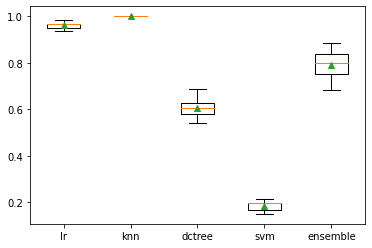

In [ ]:
models, model = get_stacking()
results, names = list(), list()

for each in models:
    scores = evaluate_model(each[1], examples, labels)
    results.append(scores)
    names.append(each[0])
    print('%s %f (%f)' % (each[0], np.mean(scores), np.std(scores)))
 
ensemble_score = evaluate_model(model, examples, labels)
results.append(ensemble_score)
names.append('ensemble')
print('%s %f (%f)' % ('ensemble', np.mean(ensemble_score), np.std(ensemble_score)))

plt.boxplot(results, labels=names, showmeans=True)
plt.show()

In [ ]:
#Using pickle for dumping the model

model.fit(examples, labels.ravel())

with open('/content/fitted_model.pickle', 'wb') as modelFile:
    model_final = pickle.dump(model, modelFile)

with open('/content/fitted_model.pickle', 'rb') as modelFile:
    model_final = pickle.load(modelFile)

predicted = model_final.predict(x_test.reshape(1, -1))[0]
print(f'Predicted Class: {predicted}')

Predicted Class: Migraine


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
